In [1]:
import sys
sys.path.append('../')

import cqt.env.mkt_env as env 
import cqt.env.mkt_env_spot as envspot
import pandas as pd
import numpy as np
import pickle

from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
file_btc = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_BTC_USD_1DAY_data.pickle'
df_btc = pd.read_pickle(file_btc)
file_eth = '../data/pickle/coinapi_ohlcv_GEMINI_SPOT_eth_USD_1DAY_data.pickle'
df_eth = pd.read_pickle(file_eth)
df_btc.data.head()

,price_close,price_open,price_high,price_low,time_close,time_open,trades_count,volume_traded,request_type,symbol_id,period_id,time_start,limit
0,4583.85,4590.00,4641.43,4495.05,2017-08-30T23:59:10.1240000Z,2017-08-30T00:00:00.8210000Z,14313,8832.814987,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
1,4736.28,4583.00,4762.76,4579.91,2017-08-31T23:59:57.7490000Z,2017-08-31T00:00:12.3180000Z,11407,7268.196353,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
2,4924.00,4736.28,4924.00,4709.28,2017-09-01T23:59:37.9730000Z,2017-09-01T00:00:11.4080000Z,11470,8188.879244,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
3,4642.85,4924.00,4985.00,4505.00,2017-09-02T23:59:51.6230000Z,2017-09-02T00:00:17.9900000Z,20976,13402.051241,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000
4,4607.47,4643.63,4740.41,4460.05,2017-09-03T23:57:28.9910000Z,2017-09-03T00:00:00.0920000Z,12831,9479.341778,ohlcv,GEMINI_SPOT_BTC_USD,1DAY,2017-08-29T10:23:14,100000


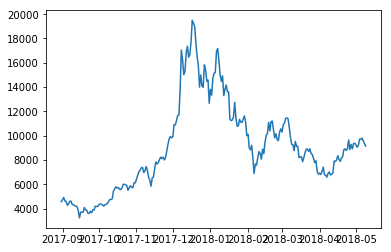

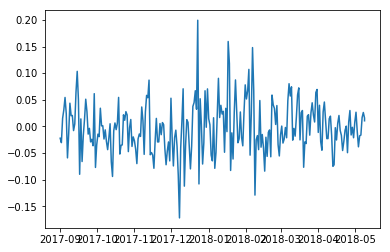

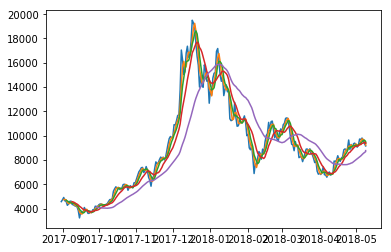

In [3]:
config = {}
sec_btc = envspot.MktEnvSpot('btc', df_btc)
sec_eth = envspot.MktEnvSpot('eth', df_eth)
sec_btc.plot_price_close()
sec_btc.plot_log_return()
sec_btc.plot_close_moving_average([1,3,5,10,30])

In [4]:
sec_btc.data.head()

,btc_price_close,btc_price_open,btc_price_high,btc_price_low,btc_trades_count,btc_volume_traded,btc_time_open,btc_price_mid,btc_range_open,btc_range_close,btc_range_high,btc_range_low,btc_period_abs_return,btc_period_log_return
time_close,,,,,,,,,,,,,,
2017-08-31,4583.85,4590.00,4641.43,4495.05,14313,8832.814987,2017-08-30T00:00:00.8210000Z,4568.240,0.004763,0.003417,0.016021,-0.016021,NaN,NaN
2017-09-01,4736.28,4583.00,4762.76,4579.91,11407,7268.196353,2017-08-31T00:00:12.3180000Z,4671.335,-0.018910,0.013903,0.019571,-0.019571,-0.022070,-0.022317
2017-09-02,4924.00,4736.28,4924.00,4709.28,11470,8188.879244,2017-09-01T00:00:11.4080000Z,4816.640,-0.016684,0.022289,0.022289,-0.022289,-0.030167,-0.030632
2017-09-03,4642.85,4924.00,4985.00,4505.00,20976,13402.051241,2017-09-02T00:00:17.9900000Z,4745.000,0.037724,-0.021528,0.050580,-0.050580,0.015098,0.014985
2017-09-04,4607.47,4643.63,4740.41,4460.05,12831,9479.341778,2017-09-03T00:00:00.0920000Z,4600.230,0.009434,0.001574,0.030472,-0.030472,0.031470,0.030985


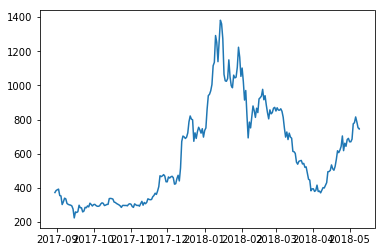

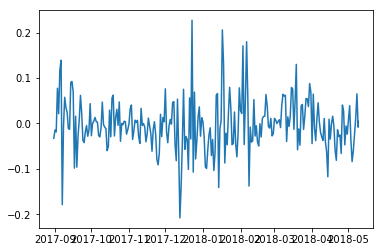

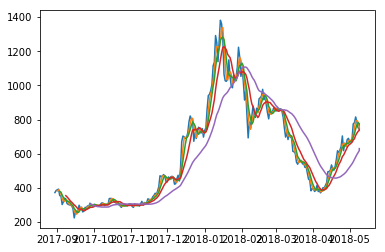

In [5]:
sec_eth.plot_price_close()
sec_eth.plot_log_return()
sec_eth.plot_close_moving_average([1,3,5,10,30])

In [6]:
env_btc_eth = env.MktEnv([])
env_btc_eth.insert_section(sec_btc)
env_btc_eth.insert_section(sec_eth)

file_btc_eth = open('../data/pickle/model_btc_eth.pickle', 'wb')
pickle.dump(env_btc_eth, file_btc_eth)

In [7]:
# Util function to combine close prices
print(env_btc_eth.get_prices_close_frame())

            btc_price_close  eth_price_close
time_close                                  
2017-08-31          4583.85           384.00
2017-09-01          4736.28           388.48
2017-09-02          4924.00           392.13
2017-09-03          4642.85           354.39
2017-09-04          4607.47           352.18
2017-09-05          4278.86           301.73
2017-09-06          4393.00           317.62
2017-09-07          4609.17           339.12
2017-09-08          4623.19           335.00
2017-09-09          4346.24           307.98
2017-09-10          4325.17           302.83
2017-09-11          4243.48           299.84
2017-09-12          4209.69           298.36
2017-09-13          4155.55           293.80
2017-09-14          3855.01           275.49
2017-09-15          3242.63           223.41
2017-09-16          3709.85           258.48
2017-09-17          3715.38           255.01
2017-09-18          3716.46           260.02
2017-09-19          4098.03           297.79
2017-09-20

In [8]:
# Util function to return stats
print(env_btc_eth.get_stats())

{'btc': {'btc_price_close': count      253.000000
mean      8968.936403
std       3662.573302
min       3242.630000
25%       6340.000000
50%       8553.500000
75%      10910.180000
max      19499.990000
Name: btc_price_close, dtype: float64, 'btc_price_open': count      253.000000
mean      8950.292451
std       3672.465937
min       3241.320000
25%       6132.520000
50%       8526.540000
75%      10910.180000
max      19499.980000
Name: btc_price_open, dtype: float64, 'btc_price_high': count      253.000000
mean      9336.197194
std       3865.267948
min       3758.120000
25%       6500.000000
50%       8932.160000
75%      11372.510000
max      19999.000000
Name: btc_price_high, dtype: float64, 'btc_price_low': count      253.000000
mean      8489.478300
std       3378.535596
min       2955.010000
25%       5931.340000
50%       8119.700000
75%      10248.000000
max      18870.000000
Name: btc_price_low, dtype: float64, 'btc_trades_count': count      253.000000
mean     21708.667984

In [36]:
from sklearn.decomposition import PCA
df = env_btc_eth.get_prices_close_frame()

array([[0.99860666, 0.05277068]])

In [48]:
df_pca = df.copy()
for col in df_pca.columns:
    df_pca[col] = df_pca[col]/df_pca[col].min()
    
pca = PCA(n_components=1)
pca.fit(df_pca)    
print(pca.components_)
df_pca['pca_0'] = pca.transform(df_pca)

[[0.65168449 0.75849016]]


In [49]:
df_pca.head()

,btc_price_close,eth_price_close,pca_0
time_close,,,
2017-08-31,1.413621,1.718813,-1.585470
2017-09-01,1.460629,1.738866,-1.539626
2017-09-02,1.518520,1.755203,-1.489507
2017-09-03,1.431816,1.586276,-1.674140
2017-09-04,1.420905,1.576384,-1.688754


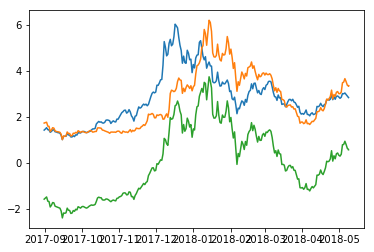

In [50]:
for col in df_pca.columns:
    plt.plot(df_pca.index, df_pca[col].values, label=col)
plt.show()